In [1]:
"""
Compute and plot the leading EOF of sea surface temperature in the
central and northern Pacific during winter time.

The spatial pattern of this EOF is the canonical El Nino pattern, and
the associated time series shows large peaks and troughs for well-known
El Nino and La Nina events.

This example uses the metadata-retaining xarray interface.

Additional requirements for this example:

    * xarray (http://xarray.pydata.org)
    * matplotlib (http://matplotlib.org/)
    * cartopy (http://scitools.org.uk/cartopy/)

"""
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import matplotlib.pyplot as plt
import numpy as np
import xarray as xr

from eofs.xarray import Eof
from eofs.examples import example_data_path


# Read SST anomalies using the xarray module. The file contains November-March
# averages of SST anomaly in the central and northern Pacific.
filename = example_data_path('sst_ndjfm_anom.nc')
sst = xr.open_dataset(filename)['sst']

# Create an EOF solver to do the EOF analysis. Square-root of cosine of
# latitude weights are applied before the computation of EOFs.
coslat = np.cos(np.deg2rad(sst.coords['latitude'].values))
wgts = np.sqrt(coslat)[..., np.newaxis]
solver = Eof(sst, weights=wgts)

# Retrieve the leading EOF, expressed as the correlation between the leading
# PC time series and the input SST anomalies at each grid point, and the
# leading PC time series itself.
eof1 = solver.eofsAsCorrelation(neofs=1)
pc1 = solver.pcs(npcs=1, pcscaling=1)

In [5]:
sst

<xarray.DataArray 'sst' (time: 50, latitude: 18, longitude: 30)>
array([[[ 4.318080e-01,           nan, ..., -5.099366e-04, -6.166888e-02],
        [ 3.851656e-02,  1.042517e-01, ..., -1.178146e-01, -1.578676e-01],
        ...,
        [          nan,           nan, ...,           nan,           nan],
        [          nan,           nan, ...,           nan,           nan]],

       [[ 2.928355e-01,           nan, ..., -3.901250e-01, -5.419934e-01],
        [ 1.990132e-01,  6.390592e-01, ..., -1.983026e-01, -3.549605e-01],
        ...,
        [          nan,           nan, ...,           nan,           nan],
        [          nan,           nan, ...,           nan,           nan]],

       ...,

       [[ 7.829272e-01,           nan, ..., -1.392927e+00, -1.070007e+00],
        [ 4.601060e-01,  2.474768e-01, ..., -7.000861e-01, -7.082649e-01],
        ...,
        [          nan,           nan, ...,           nan,           nan],
        [          nan,           nan, ...,           nan,           nan]],

       [[ 5.567895e-01,           nan, ..., -1.788158e-02, -1.602829e-01],
        [ 5.618092e-01,  4.567434e-01, ...,  5.617435e-01,  2.904408e-01],
        ...,
        [          nan,           nan, ...,           nan,           nan],
        [          nan,           nan, ...,           nan,           nan]]])
Coordinates:
  * time       (time) datetime64[ns] 1963-01-15T12:00:00 ... 2012-01-16
  * latitude   (latitude) float32 -22.5 -17.5 -12.5 -7.5 ... 47.5 52.5 57.5 62.5
  * longitude  (longitude) float32 117.5 122.5 127.5 132.5 ... 252.5 257.5 262.5
Attributes:
    standard_name:  sea_surface_temperature
    long_name:      NDJFM mean SST anomalies

In [4]:
eof1.shape

(1, 18, 30)

In [3]:
eof1

<xarray.DataArray 'eofs' (mode: 1, latitude: 18, longitude: 30)>
array([[[-0.33455748,         nan,         nan,         nan,
                 nan,         nan,  0.12679315,  0.07910696,
         -0.11482373, -0.19574957, -0.32923902, -0.50018593,
         -0.60101402, -0.6569725 , -0.647073  , -0.57615976,
         -0.53957011, -0.55623436, -0.52764656, -0.39069971,
         -0.27282364, -0.22792861, -0.14410796, -0.02161977,
          0.1631075 ,  0.25456166,  0.31576198,  0.44744431,
          0.40436836,  0.373819  ],
        [-0.09018618,  0.13953608,         nan,         nan,
                 nan,  0.18227303,  0.03788132, -0.16454059,
         -0.2361193 , -0.23187708, -0.30594496, -0.46799408,
         -0.60864458, -0.57598408, -0.33022135, -0.1594717 ,
         -0.07591936,  0.03015077,  0.21815844,  0.44067281,
          0.56296161,  0.63807639,  0.70999864,  0.7434753 ,
          0.73797589,  0.73696634,  0.68104469,  0.58128706,
          0.55678109,  0.51633752],
        [ 0.32023231,  0.36478103,  0.31142752,  0.23145979,
          0.17342503,  0.01367959, -0.22438996, -0.37370242,
         -0.25111984, -0.08779491, -0.09836736, -0.1110918 ,
         -0.032738  ,  0.17244171,  0.463335  ,  0.62978715,
...
          0.30605856,  0.36483577,  0.46384391,  0.50088703,
          0.546139  ,  0.5963999 ,  0.58756631,  0.45593872,
                 nan,         nan,         nan,         nan,
                 nan,         nan],
        [        nan,         nan,         nan,         nan,
                 nan,         nan,         nan, -0.03367581,
                 nan, -0.34988746, -0.12444426,  0.055656  ,
          0.08203412,  0.13218606,  0.25970352,  0.43312897,
          0.30891627,  0.32977371,  0.50240615,  0.42571603,
          0.33218734,  0.40071128,  0.39414888,         nan,
                 nan,         nan,         nan,         nan,
                 nan,         nan],
        [        nan,         nan,         nan,         nan,
                 nan,         nan,         nan,         nan,
                 nan,         nan,         nan,  0.11691164,
          0.22014872,  0.26073905,         nan,         nan,
                 nan,         nan,         nan,  0.26927962,
                 nan,         nan,         nan,         nan,
                 nan,         nan,         nan,         nan,
                 nan,         nan]]])
Coordinates:
  * mode       (mode) int32 0
  * latitude   (latitude) float32 -22.5 -17.5 -12.5 -7.5 ... 47.5 52.5 57.5 62.5
  * longitude  (longitude) float32 117.5 122.5 127.5 132.5 ... 252.5 257.5 262.5
Attributes:
    long_name:  correlation_between_pcs_and_sst

In [6]:
pc1.shape

(50, 1)

Text(0.5, 1.0, 'EOF1 expressed as correlation')

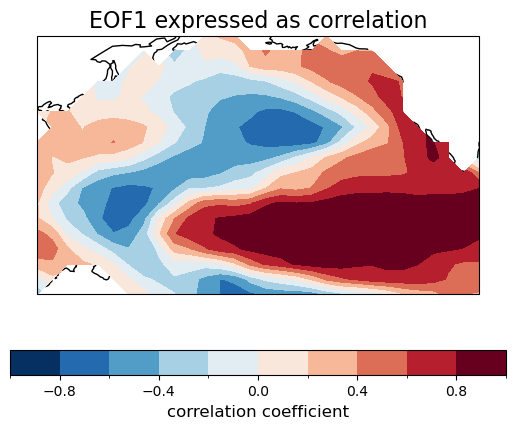

In [7]:
# Plot the leading EOF expressed as correlation in the Pacific domain.
clevs = np.linspace(-1, 1, 11)
ax = plt.axes(projection=ccrs.PlateCarree(central_longitude=190))
fill = eof1[0].plot.contourf(ax=ax, levels=clevs, cmap=plt.cm.RdBu_r,
                             add_colorbar=False, transform=ccrs.PlateCarree())
ax.add_feature(cfeature.LAND, facecolor='w', edgecolor='k')
cb = plt.colorbar(fill, orientation='horizontal')
cb.set_label('correlation coefficient', fontsize=12)
ax.set_title('EOF1 expressed as correlation', fontsize=16)

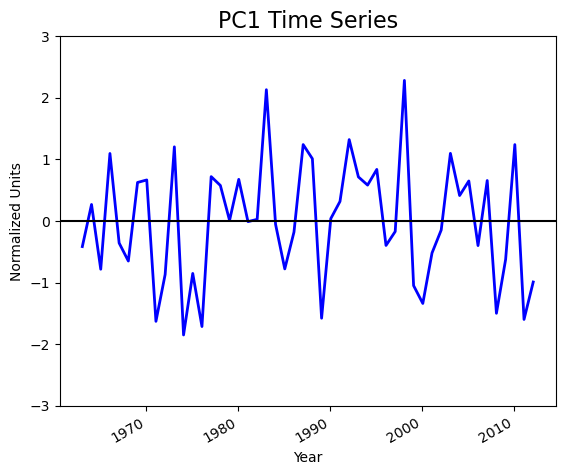

In [8]:
# Plot the leading PC time series.
plt.figure()
pc1[:, 0].plot(color='b', linewidth=2)
ax = plt.gca()
ax.axhline(0, color='k')
ax.set_ylim(-3, 3)
ax.set_xlabel('Year')
ax.set_ylabel('Normalized Units')
ax.set_title('PC1 Time Series', fontsize=16)

plt.show()